# nCov - A Geo Statistical Analysis

**Saurav Mishra**

# What is Coronavirus?

    Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe 
    diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). 
    A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

    Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found 
    that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several 
    known coronaviruses are circulating in animals that have not yet infected humans. 

    Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties.
    In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

    Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing
    and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness
    such as coughing and sneezing.
    
    
    The World Health Organization has declared the novel coronavirus outbreak a public health emergency, it has increased 
    the general fear among the public. A lot of countires have heightened their measures to fight with this virus with the 
    condition in China still senitive..More than 20 countries and territories outside of mainland China have confirmed cases 
    of the virus -- spanning Asia, Europe, North America and the Middle East -- as India, Italy and the Philippines reported 
    their first cases.

Source - 

https://www.who.int/health-topics/coronavirus

https://www.worldometers.info/coronavirus/

https://www.livescience.com/new-coronavirus-images.html


## Let's do an Exploratory analysis on the data we have so far. 

   The data has been shared in kaggle @ https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.
   
   Real time data on everyday basis is also made available by the Johns Hopkins university @ https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#
   

In [1]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import pycountry
import folium 
from folium import plugins




%config InlineBackend.figure_format = 'retina'
py.init_notebook_mode(connected=True)


# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))

In [2]:
# Utility Plotting Functions

def plotDailyReportedCasesOverTime(df, country):
    # confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of confirmed cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Confirmed cases")

    fig.update_layout(layout)
    fig.show()

    # deaths
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of reported deaths in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Deaths Reported")

    fig.update_layout(layout)
    fig.show()

    # recovered
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of recovered cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Recovered Cases")

    fig.update_layout(layout)
    fig.show()
    
     # active
    fig = px.bar(df, x="Date", y="Active")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of active cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Active Cases")

    fig.update_layout(layout)
    fig.show()

    
    
# Cases over time
def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=2, cols=2, subplot_titles=("Comfirmed", "Deaths", "Recovered", "Active"))

    subPlot1 = go.Scatter(
                    x=df['Date'],
                    y=df['Confirmed'],
                    name="Confirmed",
                    line_color='orange',
                    opacity=0.8)

    subPlot2 = go.Scatter(
                    x=df['Date'],
                    y=df['Deaths'],
                    name="Deaths",
                    line_color='red',
                    opacity=0.8)

    subPlot3 = go.Scatter(
                    x=df['Date'],
                    y=df['Recovered'],
                    name="Recovered",
                    line_color='green',
                    opacity=0.8)
    
    subPlot4 = go.Scatter(
                    x=df['Date'],
                    y=df['Active'],
                    name="Active",
                    line_color='blue',
                    opacity=0.8)

    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 2, 1)
    plot.append_trace(subPlot4, 2, 2)
    plot.update_layout(template="ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')

    plot.show()

In [3]:
# Import the data
nCoV_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

# Data Glimpse
nCoV_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# Data Info
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13850 entries, 0 to 13849
Data columns (total 8 columns):
SNo                13850 non-null int64
ObservationDate    13850 non-null object
Province/State     7107 non-null object
Country/Region     13850 non-null object
Last Update        13850 non-null object
Confirmed          13850 non-null float64
Deaths             13850 non-null float64
Recovered          13850 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 865.8+ KB


    - We would not need the Sno column for analysis. Lets drop the column.
    
    - Also the 'Last Update' column contains date but is of type object. Lets convert the same to date type so that is 
      can be used in a better way.
      
    - The 'Province/State' column has 487 non-null values. This means there are some missing values. We could fill in these
      misssing values with the corresponding 'Country' name.

In [5]:
# Convert 'Last Update' column to datetime object
nCoV_data['Last Update'] = nCoV_data['Last Update'].apply(pd.to_datetime)
nCoV_data['ObservationDate'] = nCoV_data['ObservationDate'].apply(pd.to_datetime)

# Also drop the 'SNo' and the 'Date' columns
nCoV_data.drop(['SNo'], axis=1, inplace=True)

# Fill the missing values in 'Province/State' with the 'Country' name.
nCoV_data['Province/State'] = nCoV_data['Province/State'].replace(np.nan, nCoV_data['Country/Region'])

# Data Glimpse
nCoV_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


## **Active Cases**

In [6]:
# Active Case = confirmed - deaths - recovered
nCoV_data['Active'] = nCoV_data['Confirmed'] - nCoV_data['Deaths'] - nCoV_data['Recovered']

In [7]:
# Check the Data Info again
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13850 entries, 0 to 13849
Data columns (total 8 columns):
ObservationDate    13850 non-null datetime64[ns]
Province/State     13850 non-null object
Country/Region     13850 non-null object
Last Update        13850 non-null datetime64[ns]
Confirmed          13850 non-null float64
Deaths             13850 non-null float64
Recovered          13850 non-null float64
Active             13850 non-null float64
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 865.8+ KB


In [8]:
# Lets rename the columns - 'Province/State' and 'Last Update' to remove the '/' and space respectively.
nCoV_data.rename(columns={'Last Update': 'LastUpdate', 'Province/State': 'State', 'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)

# Data Glimpse
nCoV_data.head()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0


In [9]:
# Lets check the total #Countries affected by nCoV

nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(nCoV_Countries))



['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy'

**The virus has spread to a majority of countries outside of China over time affecting lakhs of people and causing severe damage / deaths to mankind.**
**Thus the reson for categorizing this as a global pandemic by the WHO.**

In [10]:
# Convert 'Mainland China' to 'China'
nCoV_data['Country'] = np.where(nCoV_data['Country'] == 'Mainland China', 'China', nCoV_data['Country'])

# Check the # countries again
nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(nCoV_Countries))



['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungar

**Now as this data is getting updated multiple time every day and the dataset contains multiple entries for each country as a continuous series data we would only be intrested in the latest data for each country. We will create a new subset of the master data with the latest information.**

**But before doing that les us extract the day and the time - 'hour' from the master data and create new columns - day and hour**

In [11]:
nCoV_data['Day'] = nCoV_data['LastUpdate'].apply(lambda x:x.day)
nCoV_data['Hour'] = nCoV_data['LastUpdate'].apply(lambda x:x.hour)

# Data Glimpse
nCoV_data.head()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Active,Day,Hour
0,2020-01-22,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0,22,17
1,2020-01-22,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0,22,17
2,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0,22,17
3,2020-01-22,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0,22,17
4,2020-01-22,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0,22,17


# Statistical Analysis

### Distribution of Confirmed, Deaths, Recovered cases on every day basis starting from 22nd Jan 2019

***Confirmed Cases vs Day***

Text(0.5, 1.0, 'Distribution of total confirmed cases on every day basis starting from 22nd Jan')

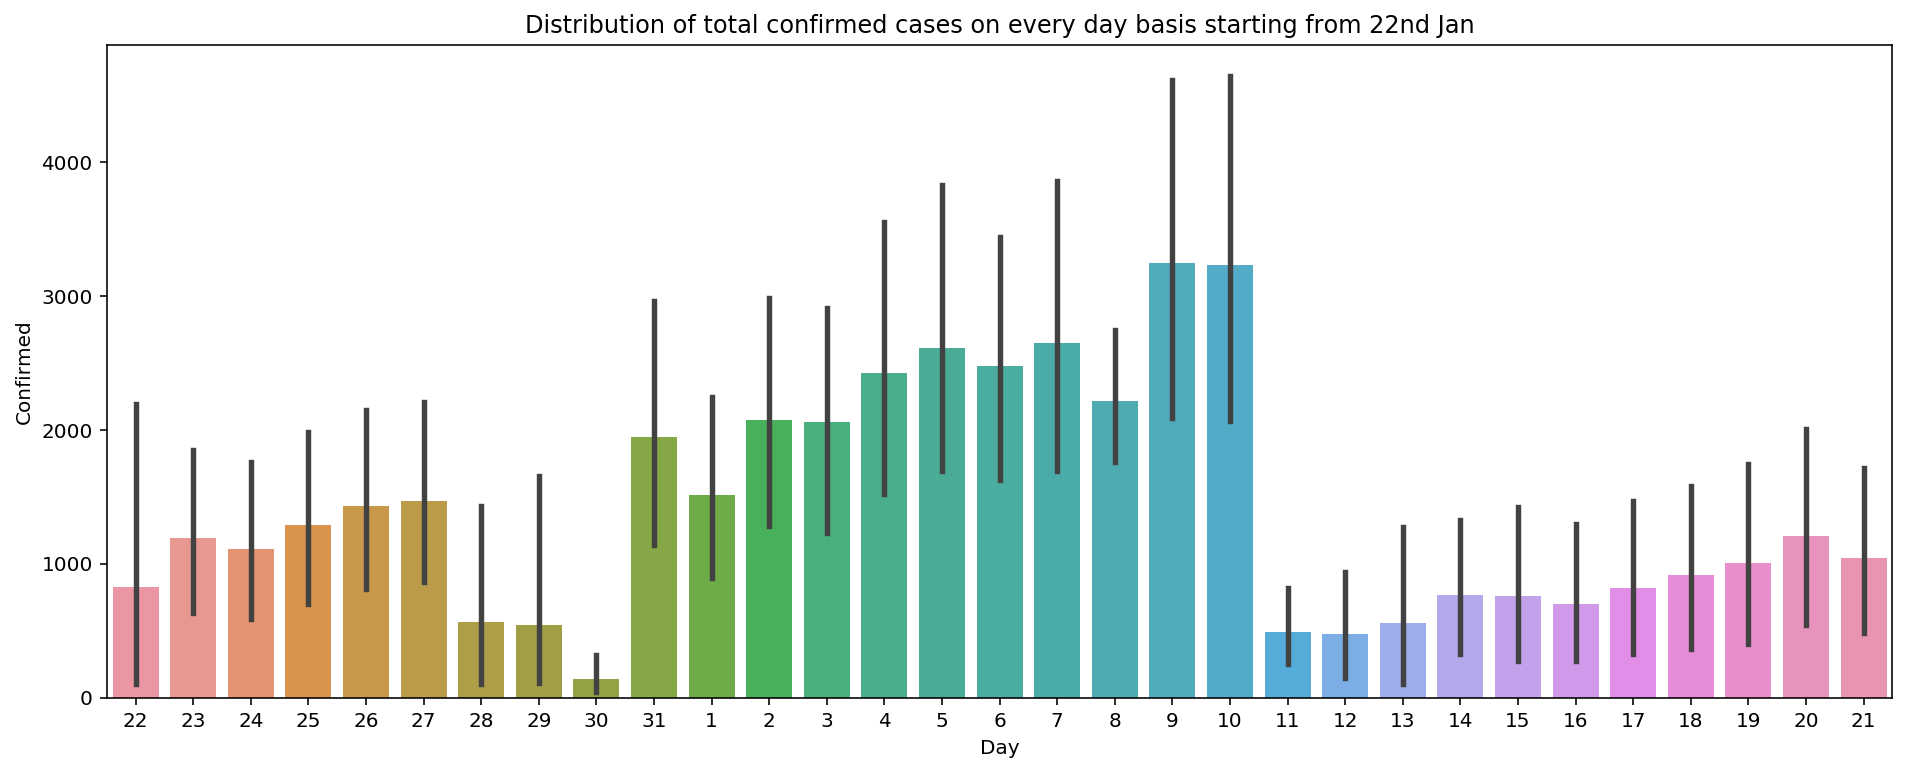

In [12]:
formatted_text('***Confirmed Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Confirmed',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis starting from 22nd Jan')

***Death Toll vs Day***

Text(0.5, 1.0, 'Distribution of total death toll on every day basis starting from 22nd Jan')

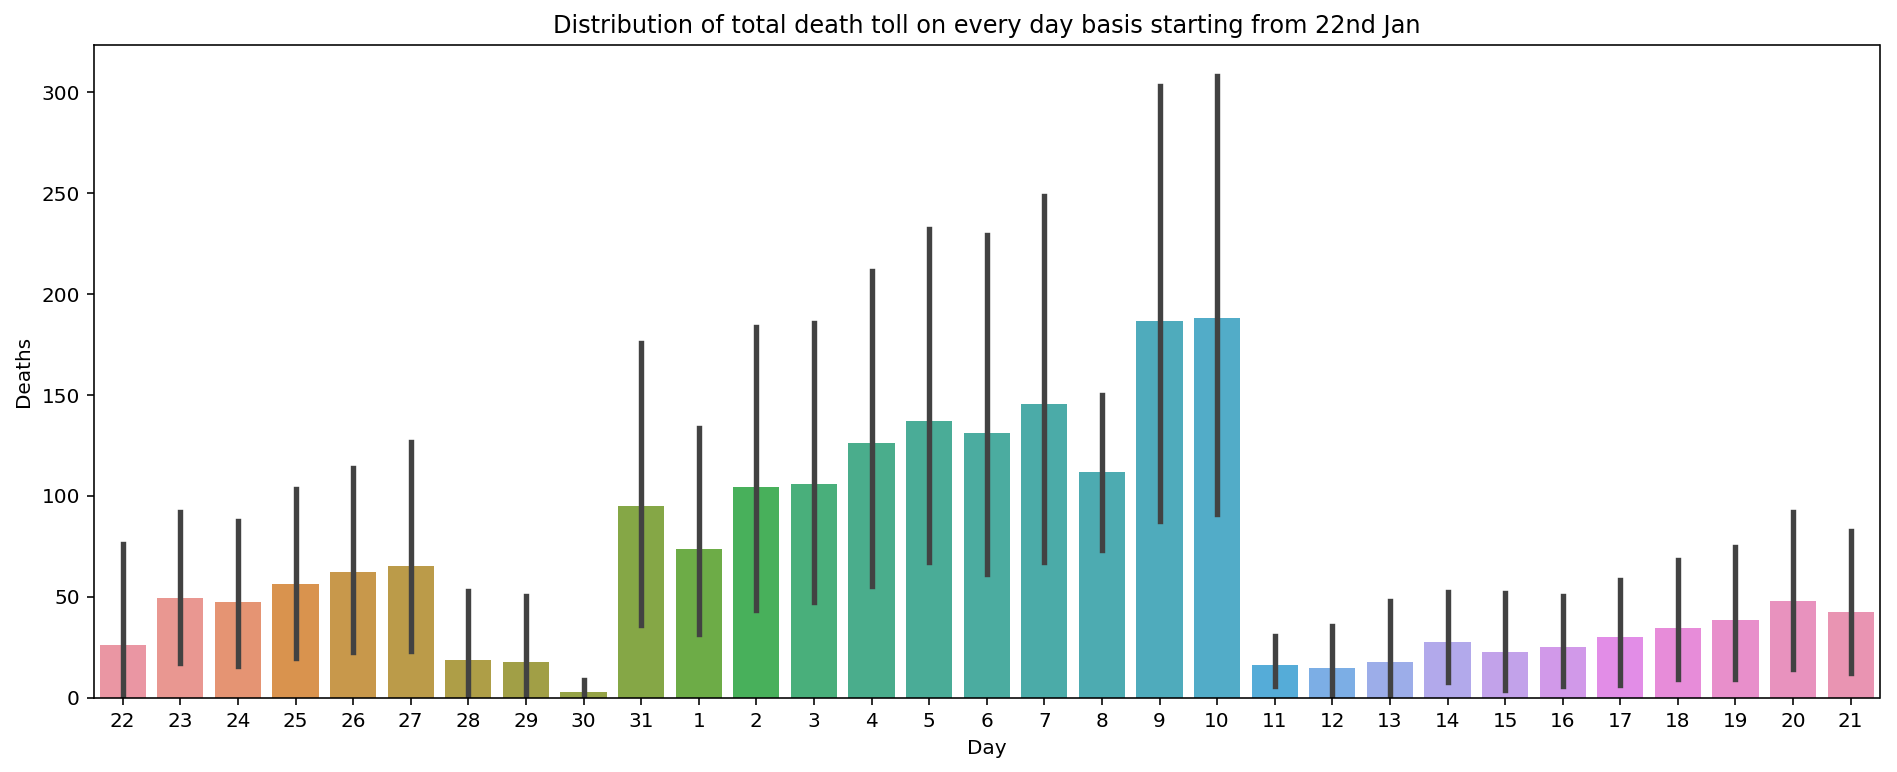

In [13]:
formatted_text('***Death Toll vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Deaths',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total death toll on every day basis starting from 22nd Jan')

***Recovered Cases vs Day***

Text(0.5, 1.0, 'Distribution of total recovered cases on every day basis starting from 22nd Jan')

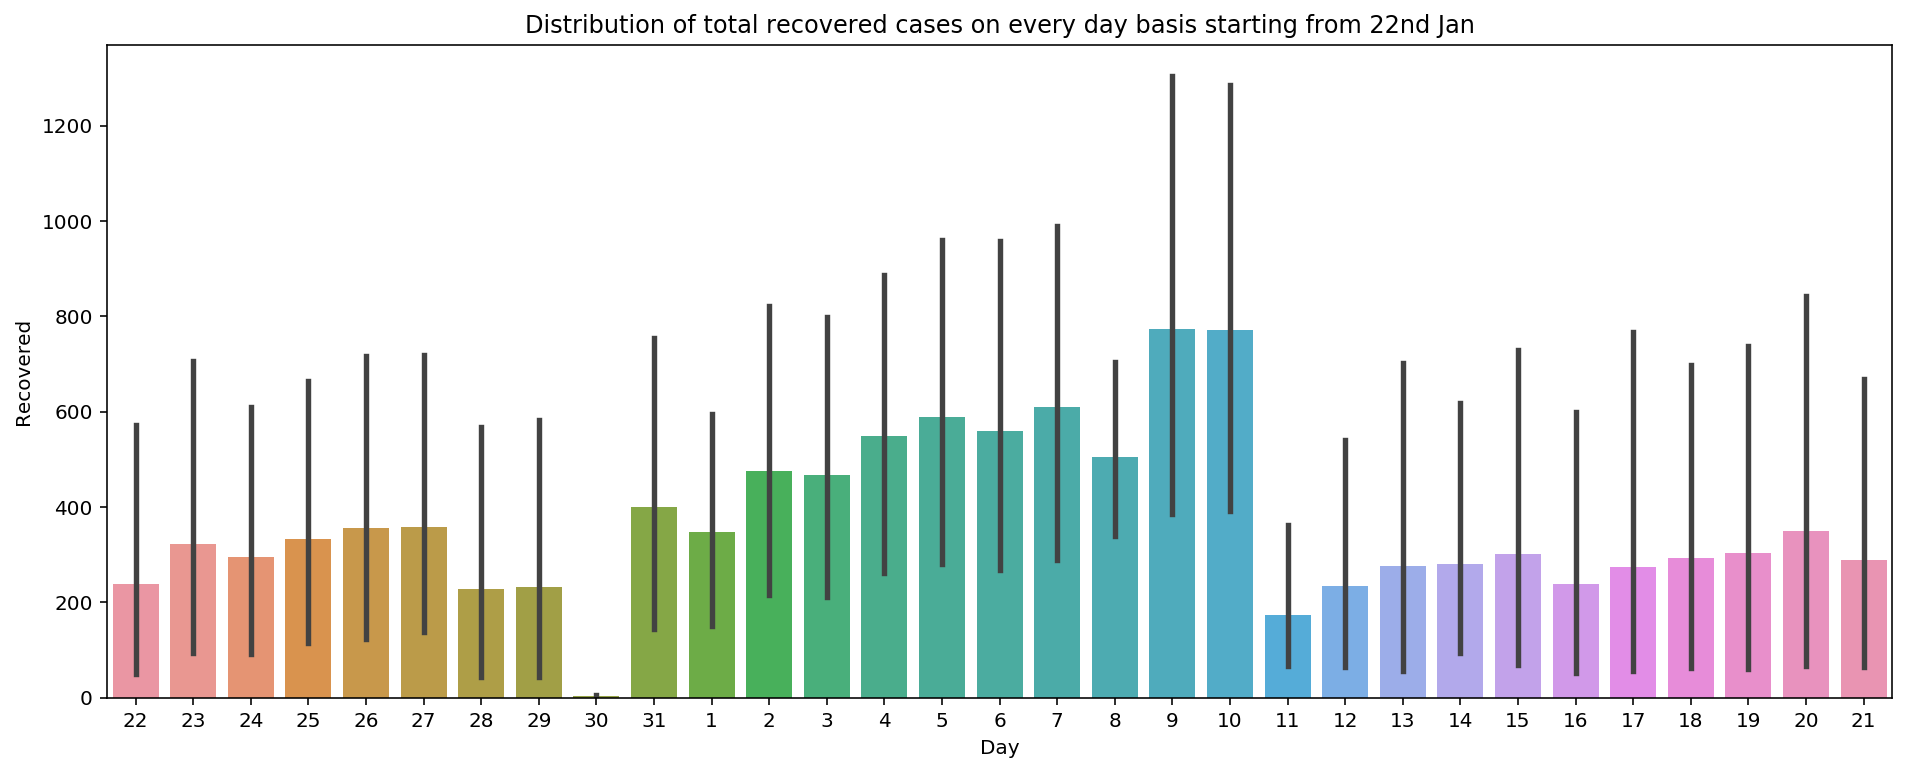

In [14]:
formatted_text('***Recovered Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Recovered',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total recovered cases on every day basis starting from 22nd Jan')

**=> As we see from the plots above, China (& Main Land China) are the worst affected regions with majority of the cases being detected right from the onset of the dealdy outbreak.**

# Current Situation

**Lets now take a look at the latest numbers. We will create a net dataset to store just the latest information.**

In [15]:
# Make the latest data extraction generic. As the data is getting updated on a daily (hourly) basis, 
# the below code would work without needing to be updated to extract the latest data.
# We will here extract the year, month and day from the last reported case and use it.
strDate = nCoV_data['Date'][-1:].astype('str')
year = int(strDate.values[0].split('-')[0])
month = int(strDate.values[0].split('-')[1])
day = int(strDate.values[0].split('-')[2].split()[0])

formatted_text('***Last reported case date-time***')
print(strDate)
print(year)
print(month)
print(strDate.values[0].split('-')[2].split())
print(pd.Timestamp(date(year,month,day)).date())

***Last reported case date-time***

13849    2020-04-10
Name: Date, dtype: object
2020
4
['10']
2020-04-10


In [72]:
latest_nCoV_data = nCoV_data[nCoV_data['LastUpdate'] > pd.Timestamp(date(year,month,day)).date()]

# Data Glimpse
latest_nCoV_data.tail()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Active,Day,Hour
13845,2020-04-10,Wyoming,US,2020-04-10 23:01:43,239.0,0.0,0.0,239.0,10,23
13846,2020-04-10,Xinjiang,China,2020-04-10 23:01:43,76.0,3.0,73.0,0.0,10,23
13847,2020-04-10,Yukon,Canada,2020-04-10 23:01:43,8.0,0.0,0.0,8.0,10,23
13848,2020-04-10,Yunnan,China,2020-04-10 23:01:43,184.0,2.0,173.0,9.0,10,23
13849,2020-04-10,Zhejiang,China,2020-04-10 23:01:43,1267.0,1.0,1235.0,31.0,10,23


In [17]:
# Getting the latest numbers

formatted_text('***Latest Numbers Globaly***')
print('Confirmed Cases around the globe : ',latest_nCoV_data['Confirmed'].sum())
print('Deaths Confirmed around the globe: ',latest_nCoV_data['Deaths'].sum())
print('Recovered Cases around the globe : ',latest_nCoV_data['Recovered'].sum())
print('Total Active Cases around the globe : ',latest_nCoV_data['Active'].sum())

***Latest Numbers Globaly***

Confirmed Cases around the globe :  1691719.0
Deaths Confirmed around the globe:  102525.0
Recovered Cases around the globe :  376096.0
Total Active Cases around the globe :  1213098.0


## Analysis of the confirmed Virus Spread Country Wise

In [18]:
formatted_text('***Countries Affected WorldWide as per the current date -***')
allCountries = latest_nCoV_data['Country'].unique().tolist()
print(allCountries)

print("\nTotal countries affected by virus: ",len(allCountries))

***Countries Affected WorldWide as per the current date -***

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'I

In [19]:
CountryWiseData = pd.DataFrame(latest_nCoV_data.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum())
CountryWiseData['Country'] = CountryWiseData.index
CountryWiseData.index = np.arange(1, len(allCountries)+1)

CountryWiseData = CountryWiseData[['Country','Confirmed', 'Deaths', 'Recovered', 'Active']]

formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'', ''Active'' Cases***')
CountryWiseData

***Country wise Analysis of Confirmed, Deaths, Recovered, Active Cases***

,Country,Confirmed,Deaths,Recovered,Active
1,Afghanistan,521.0,15.0,32.0,474.0
2,Albania,416.0,23.0,182.0,211.0
3,Algeria,1761.0,256.0,405.0,1100.0
4,Andorra,601.0,26.0,71.0,504.0
5,Angola,19.0,2.0,2.0,15.0
...,...,...,...,...,...
183,West Bank and Gaza,267.0,2.0,45.0,220.0
184,Western Sahara,4.0,0.0,0.0,4.0
185,Yemen,1.0,0.0,0.0,1.0
186,Zambia,40.0,2.0,25.0,13.0


**INFERENCES**

1. CHINA has the most recorded cases as the outbreak happenned there
2. The virus has spread to other countries as well. This could be due to people being present in China/Hubei as the time 
   of the outbreak and in the event of their return to home country unknowingly carried the virus along.

## Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases

In [20]:
date_wise_data = nCoV_data[["Date","Confirmed","Deaths","Recovered", "Active"]]
date_wise_data.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1.0,0.0,0.0,1.0
1,2020-01-22,14.0,0.0,0.0,14.0
2,2020-01-22,6.0,0.0,0.0,6.0
3,2020-01-22,1.0,0.0,0.0,1.0
4,2020-01-22,0.0,0.0,0.0,0.0


In [21]:
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

# strip off the time part from date for day-wise distribution
date_wise_data.Date = date_wise_data.Date.apply(lambda x:x.date())

formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data

***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0
...,...,...,...,...,...
75,2020-04-06,1345101.0,74565.0,276515.0,994021.0
76,2020-04-07,1426096.0,81865.0,300054.0,1044177.0
77,2020-04-08,1511104.0,88338.0,328661.0,1094105.0
78,2020-04-09,1595350.0,95455.0,353975.0,1145920.0


***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

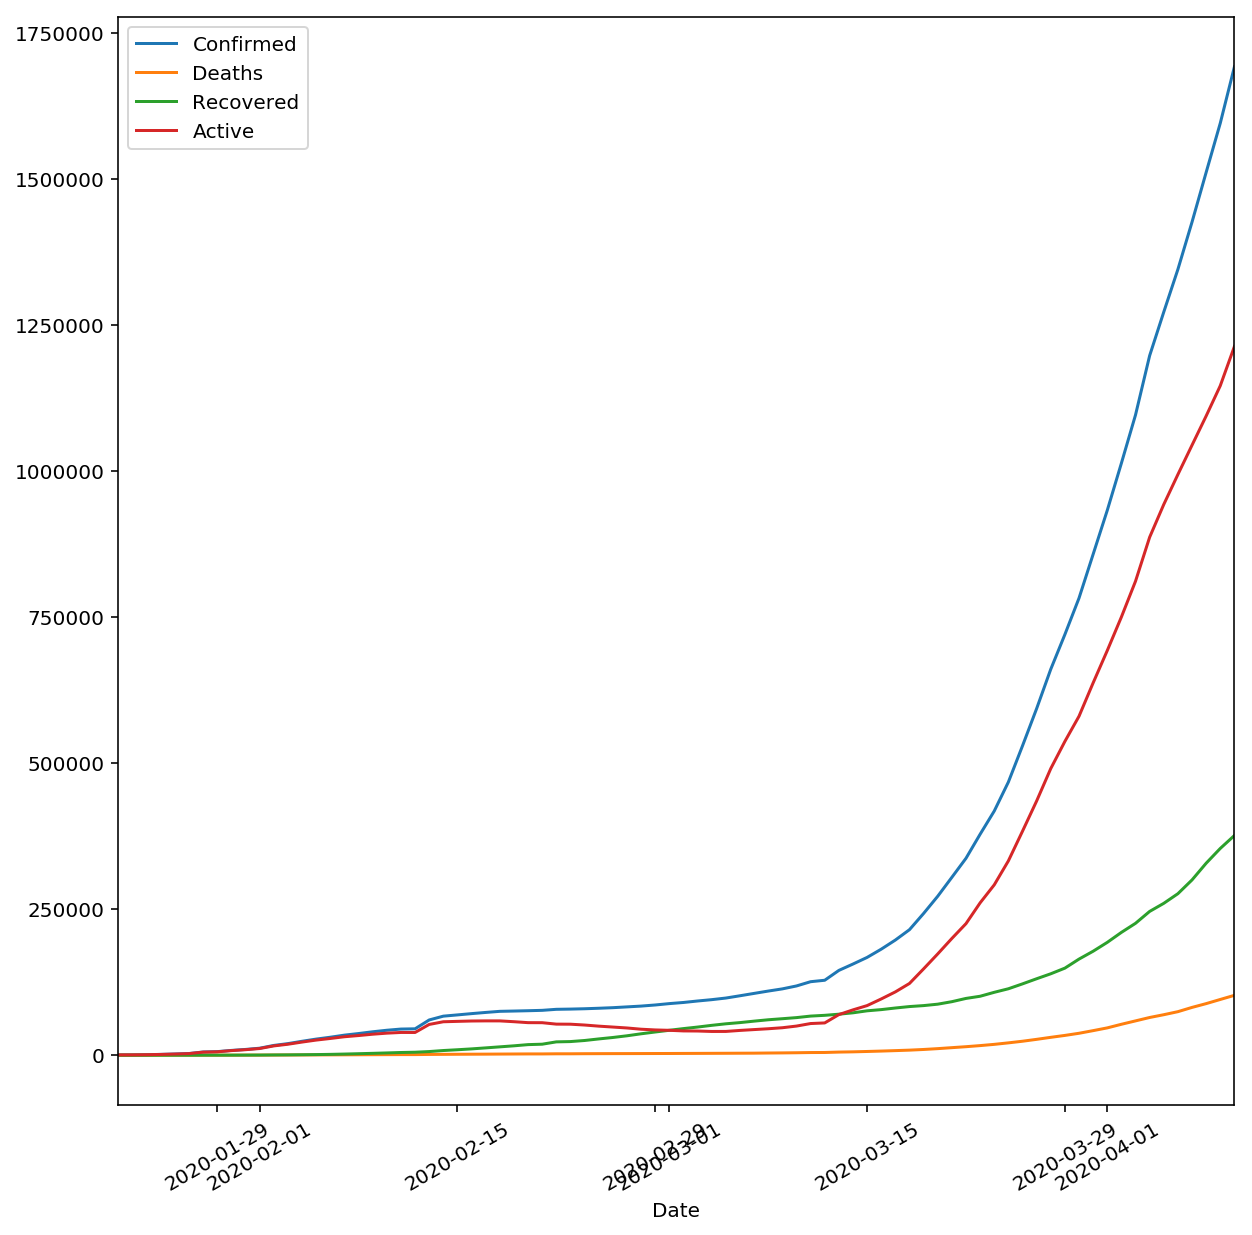

In [22]:
formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered', 'Active'],figsize=(10,10), rot=30)

## Global Spread Over Time

In [23]:
global_data_over_time = date_wise_data.groupby('Date')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(global_data_over_time, "<b>Global</b>")

In [24]:
plotDailyReportedCasesOverTime(global_data_over_time, "all over World")

**INFERENCES**

1. The number of confirmed cases is on the rise day by day. The rise is very steep. 
2. The recovery does not look that great. The number of cases recovered is far more less the the number of confirmed cases.
3. The number of death cases till tade has been 492.

## Distribution in China

In [25]:
china_latest_data = latest_nCoV_data[latest_nCoV_data['Country']=='China'][["State","Confirmed","Deaths","Recovered", "Active"]]

# Reset Index
china_latest_data.reset_index(drop=True, inplace=True)
china_latest_data.index = pd.RangeIndex(start=1, stop=len(china_latest_data['State']) + 1, step=1)

formatted_text('***Numbers in China for Confirmed, Deaths, Recovered and Active Cases***')

# Data Glimpse
china_latest_data

***Numbers in China for Confirmed, Deaths, Recovered and Active Cases***

,State,Confirmed,Deaths,Recovered,Active
1,Anhui,991.0,6.0,984.0,1.0
2,Beijing,588.0,8.0,469.0,111.0
3,Chongqing,579.0,6.0,570.0,3.0
4,Fujian,351.0,1.0,311.0,39.0
5,Gansu,139.0,2.0,135.0,2.0
6,Guangdong,1544.0,8.0,1434.0,102.0
7,Guangxi,254.0,2.0,252.0,0.0
8,Guizhou,146.0,2.0,144.0,0.0
9,Hainan,168.0,6.0,162.0,0.0
10,Hebei,327.0,6.0,313.0,8.0


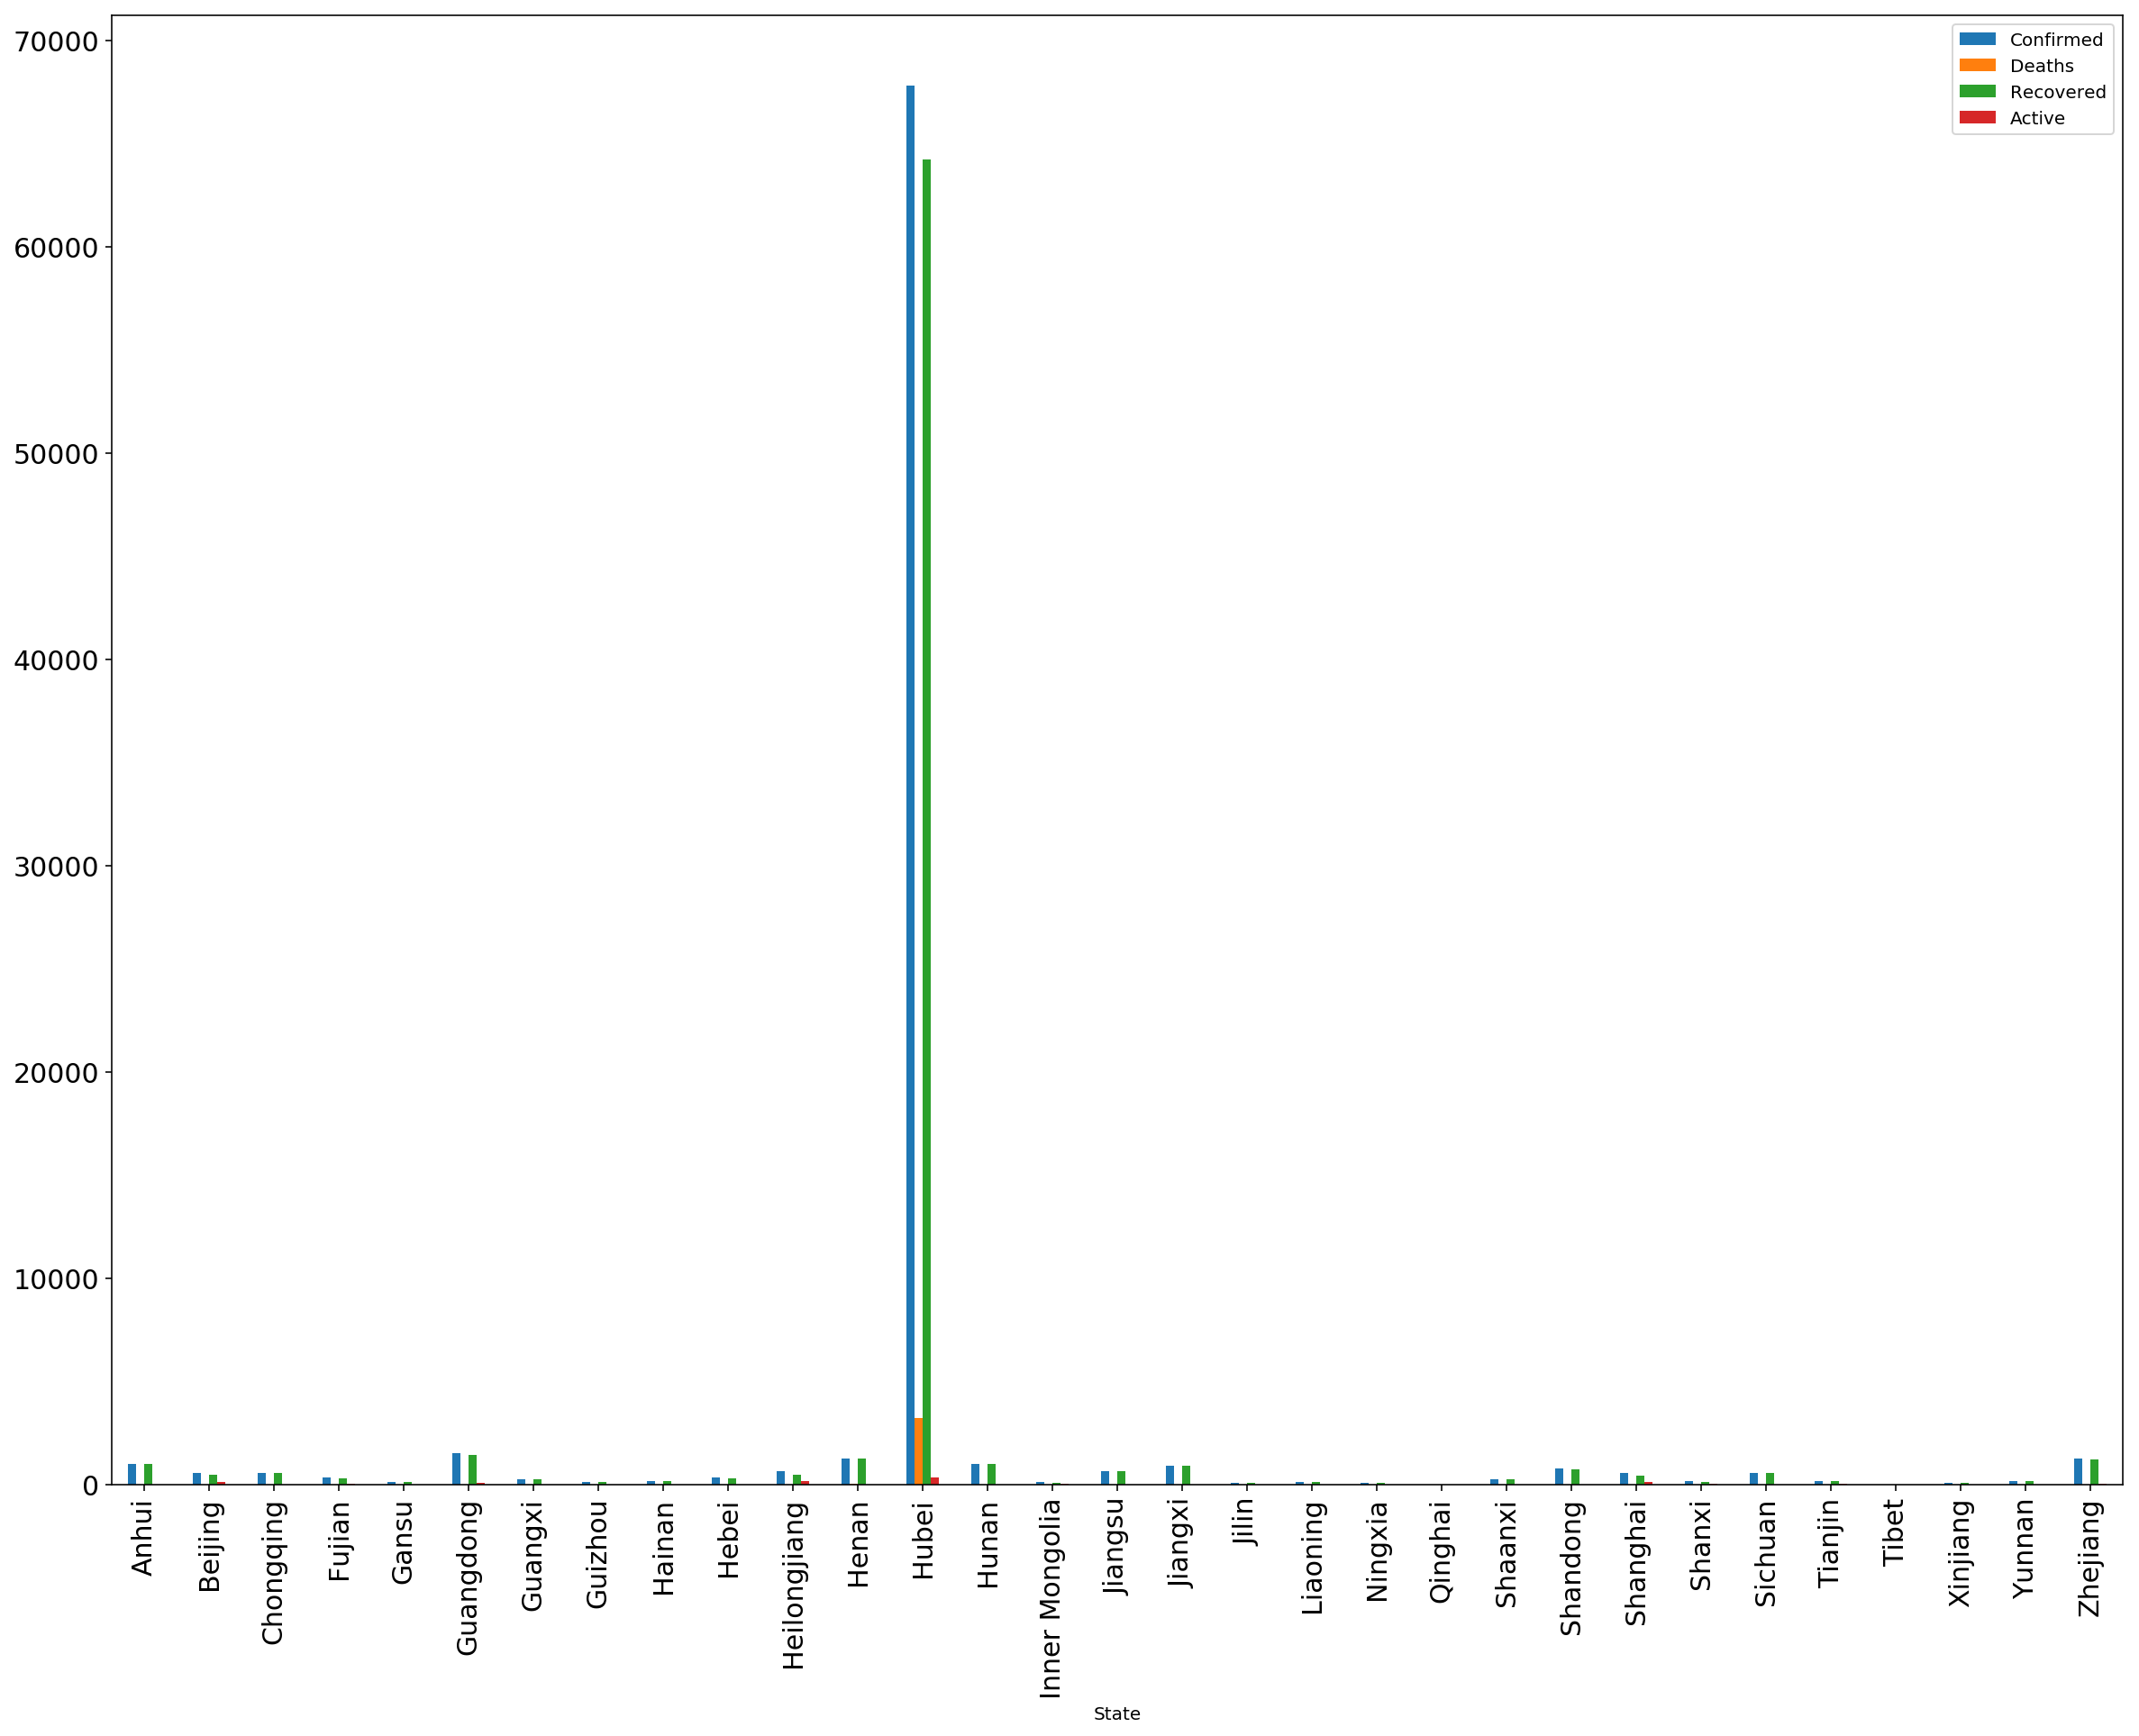

In [26]:
china_latest_data.plot('State',['Confirmed', 'Deaths', 'Recovered', 'Active'],kind='bar',figsize=(20,15), fontsize=15)

## nCov Distribution - Hubei

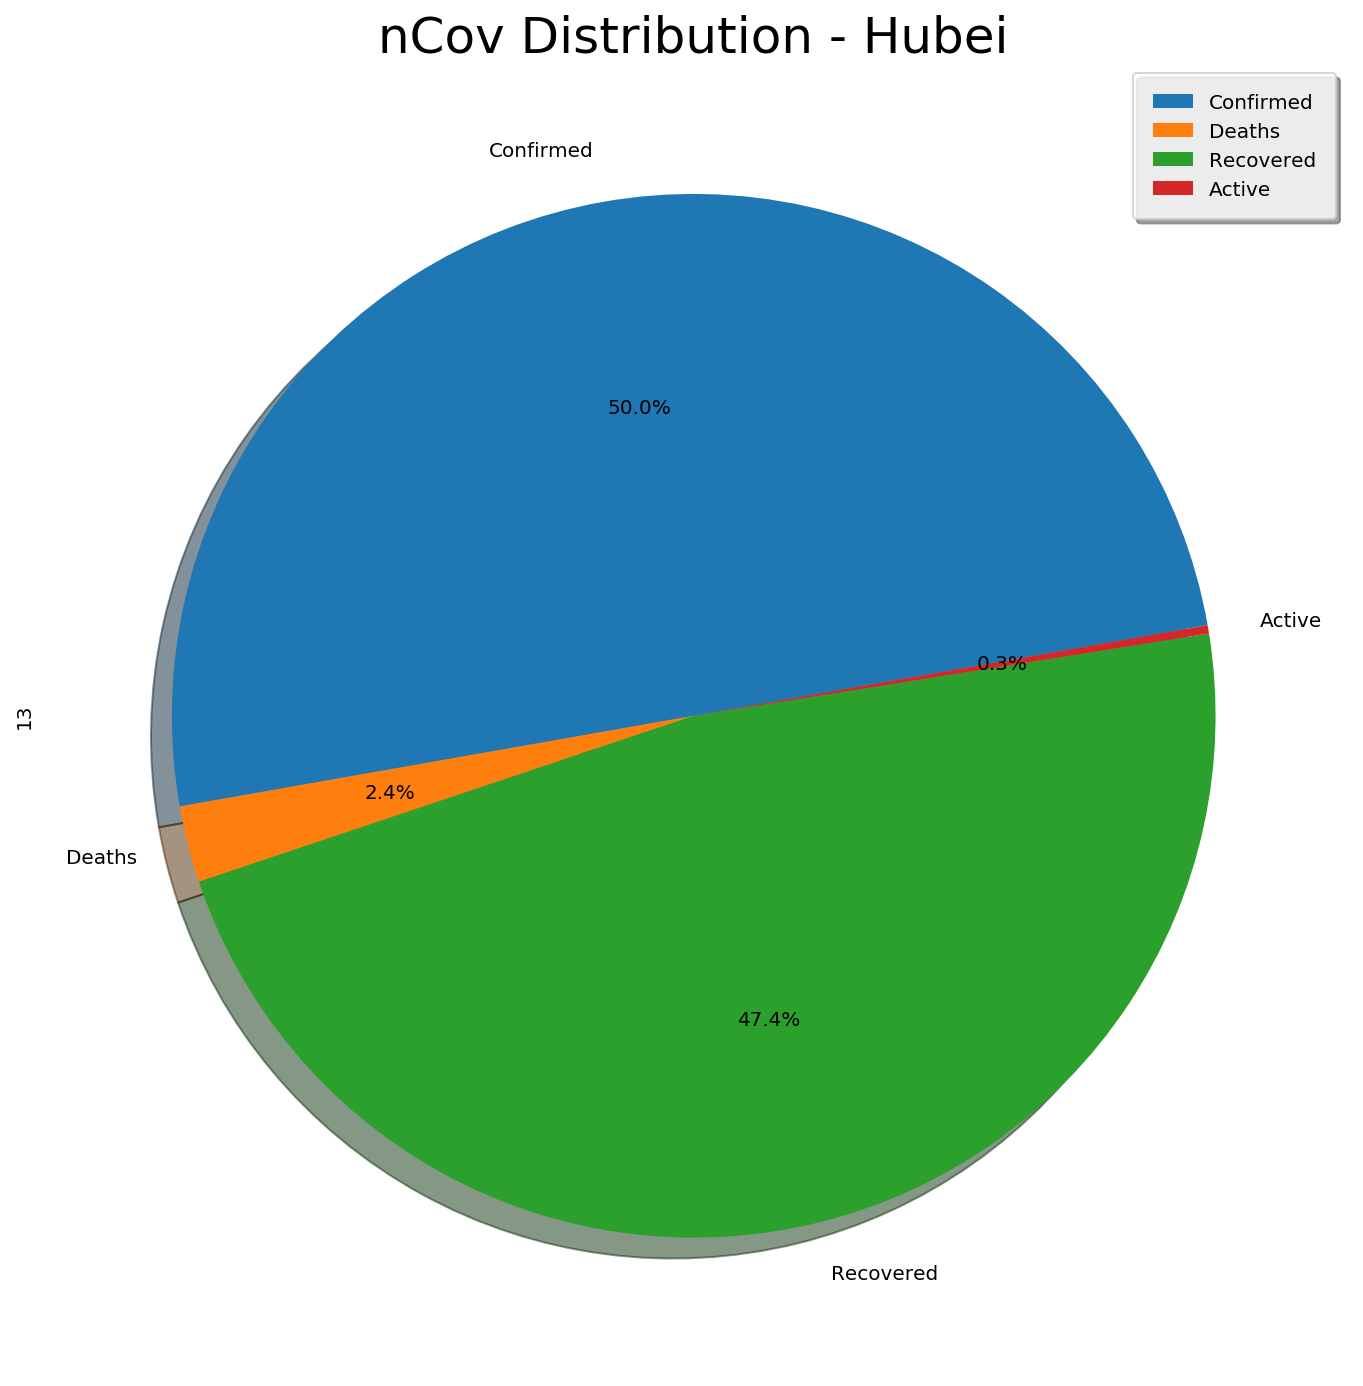

In [27]:
Hubei = china_latest_data[china_latest_data.State=='Hubei']
Hubei = Hubei[['Confirmed','Deaths','Recovered', 'Active']] # Remove the state column as it does not have any numeric data
Hubei = Hubei.iloc[0]
#Hubei

plt.figure(figsize=(12,12))

Hubei.plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=10)

plt.title('nCov Distribution - Hubei',size=25)
plt.legend(loc = "upper right"
           , fontsize = 10
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1);

## Hubei - Spread Over Time

In [28]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered", "Active"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
hubei_data_over_time = nCoV_data[nCoV_data['State'] == 'Hubei']

scatterPlotCasesOverTime(hubei_data_over_time, "<b>Hubei</b>")

**INFERENCES**

1. Hubei is the worst affected by nCov with almost 95% of cases reported.
2. The recovery from the virus has not been that rapid. As the number of cases being reported is increasing at a very 
   rapid rate and the virus being a new one proper medical treatment not available to treat the virus could the 
   possible reason for the slowed down recovery. This can also be the reason for the number of deaths increasing day by day.
   The virus does not match any other known virus. This raised concern because when a virus is new, we do not know how 
   it affects people.
   


**However a team of doctors in Thailand have seen some apparent success treating Coronavirus with drug cocktail.
   The doctors combined the anti-flu drug oseltamivir with lopinavir and ritonavir, anti-virals used to treat HIV, 
   Kriengsak said, adding the ministry was awaiting research results to prove the findings.**

**Read more at:**
https://economictimes.indiatimes.com/news/international/world-news/thailand-sees-apparent-success-treating-virus-with-drug-cocktail/articleshow/73879572.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

## Rest Of China (Excluding Hubei)

In [29]:
rest_of_China = china_latest_data[china_latest_data['State'] !='Hubei'][["State", "Confirmed","Deaths","Recovered", "Active"]]

# Reset Index to start from 1
rest_of_China.reset_index(drop=True, inplace=True)
rest_of_China.index = pd.RangeIndex(start=1, stop=len(china_latest_data['State']), step=1)

formatted_text('***Numbers in rest of China for Confirmed, Deaths, Recovered and Active Cases***')

# Data Glimpse
rest_of_China

***Numbers in rest of China for Confirmed, Deaths, Recovered and Active Cases***

,State,Confirmed,Deaths,Recovered,Active
1,Anhui,991.0,6.0,984.0,1.0
2,Beijing,588.0,8.0,469.0,111.0
3,Chongqing,579.0,6.0,570.0,3.0
4,Fujian,351.0,1.0,311.0,39.0
5,Gansu,139.0,2.0,135.0,2.0
6,Guangdong,1544.0,8.0,1434.0,102.0
7,Guangxi,254.0,2.0,252.0,0.0
8,Guizhou,146.0,2.0,144.0,0.0
9,Hainan,168.0,6.0,162.0,0.0
10,Hebei,327.0,6.0,313.0,8.0


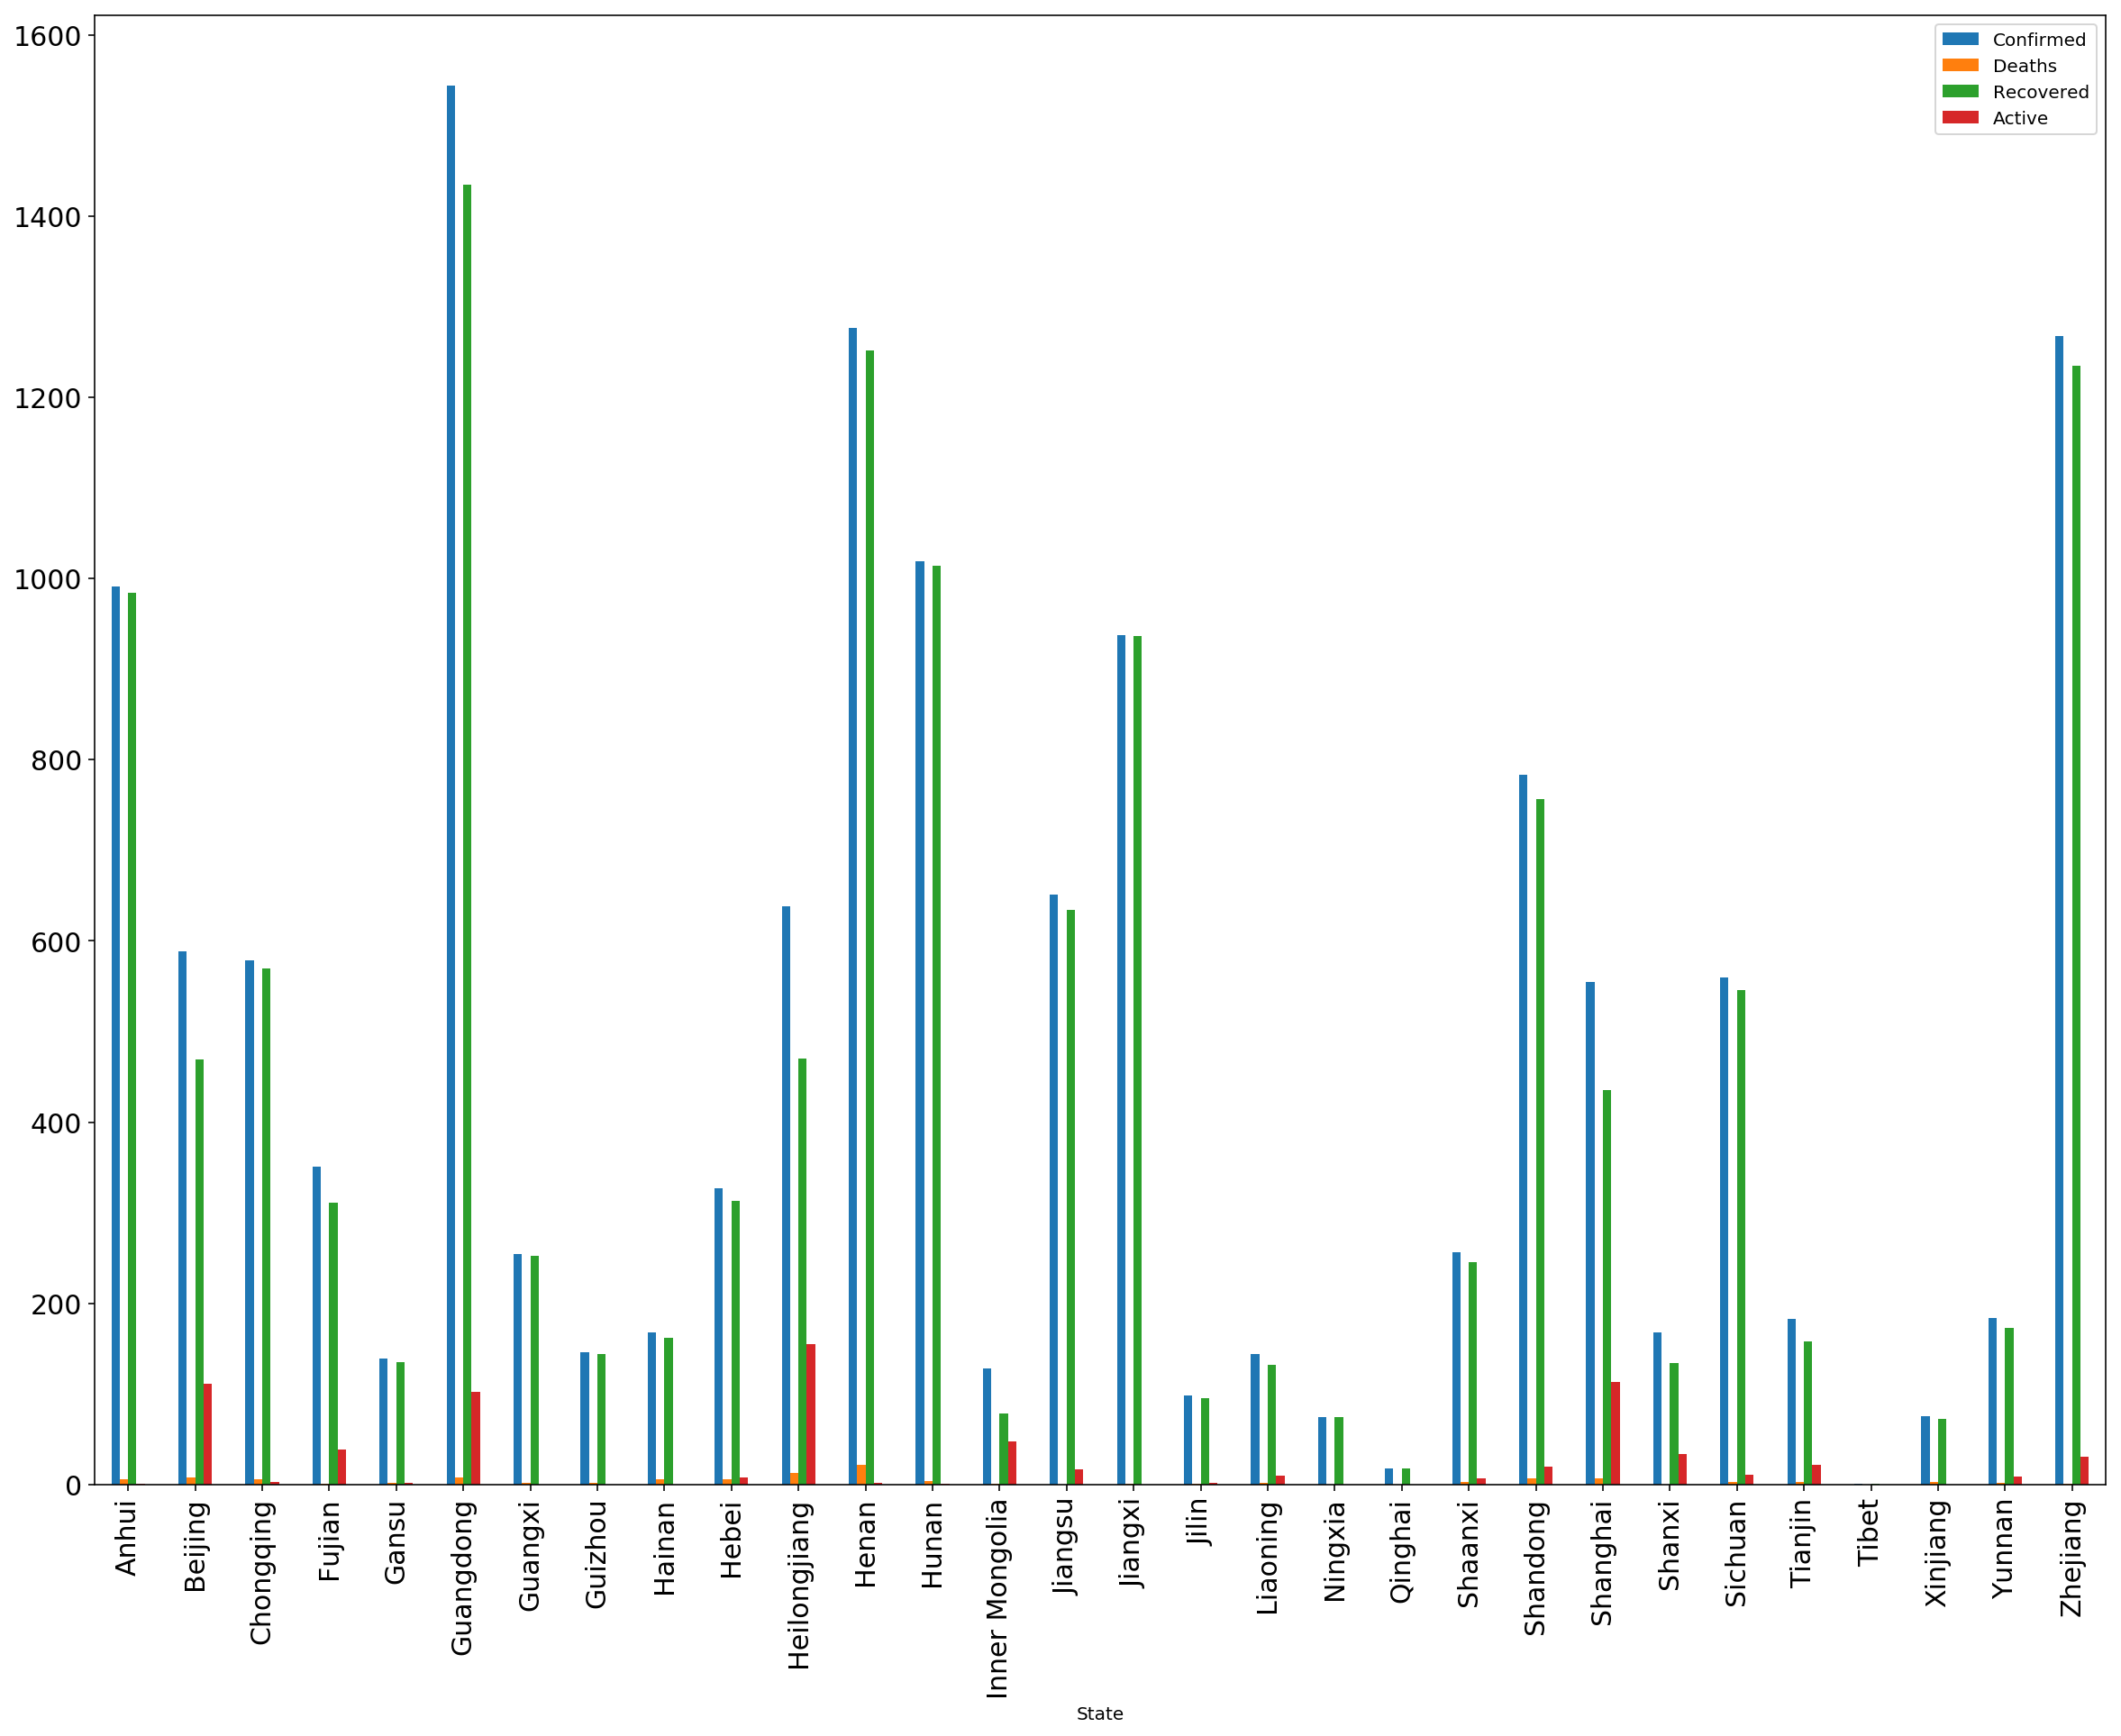

In [30]:
rest_of_China.plot('State',['Confirmed', 'Deaths', 'Recovered', 'Active'],kind='bar',figsize=(20,15), fontsize=15)

In [31]:
formatted_text('***Most number of Confirmed Cases Outside of Hubei***')
print(rest_of_China[rest_of_China['Confirmed'] > 500])

***Most number of Confirmed Cases Outside of Hubei***

           State  Confirmed  Deaths  Recovered  Active
1          Anhui      991.0     6.0      984.0     1.0
2        Beijing      588.0     8.0      469.0   111.0
3      Chongqing      579.0     6.0      570.0     3.0
6      Guangdong     1544.0     8.0     1434.0   102.0
11  Heilongjiang      638.0    13.0      470.0   155.0
12         Henan     1276.0    22.0     1252.0     2.0
13         Hunan     1019.0     4.0     1014.0     1.0
15       Jiangsu      651.0     0.0      634.0    17.0
16       Jiangxi      937.0     1.0      936.0     0.0
22      Shandong      783.0     7.0      756.0    20.0
23      Shanghai      555.0     7.0      435.0   113.0
25       Sichuan      560.0     3.0      546.0    11.0
30      Zhejiang     1267.0     1.0     1235.0    31.0


## Rest of China (Excluding Hubei) - Spread Over Time

In [32]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered", "Active"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
chinese_data_over_time = nCoV_data[(nCoV_data['Country'] == 'China') & (nCoV_data['State'] != 'Hubei')]
chinese_data_over_time = chinese_data_over_time.groupby('Date')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(chinese_data_over_time, "<b>Rest of China</b>")

In [33]:
plotDailyReportedCasesOverTime(chinese_data_over_time, "Rest of China")

**INFREENCES**

1. There have been many confirmed cases reported outside of Hubei. Zhejiang, Guangdong, Henan, Hunan beng the top four.

2. The recovery from the virus outside of Hubei has not been fast. The virus did not match any other known virus. This 
    raised concern because when a virus is new, we do not know how it affects people. However the number of deaths have 
    very minimal.


**A team of doctors in Thailand have seen some apparent success treating Coronavirus with drug cocktail.
   The doctors combined the anti-flu drug oseltamivir with lopinavir and ritonavir, anti-virals used to treat HIV, 
   Kriengsak said, adding the ministry was awaiting research results to prove the findings.**

**Read more at:**
https://economictimes.indiatimes.com/news/international/world-news/thailand-sees-apparent-success-treating-virus-with-drug-cocktail/articleshow/73879572.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Top 10 Countries

In [34]:
top10 = CountryWiseData.sort_values('Confirmed',ascending=False)[:10]
top10

,Country,Confirmed,Deaths,Recovered,Active
175,US,496535.0,18586.0,28790.0,449159.0
159,Spain,158273.0,16081.0,55668.0,86524.0
85,Italy,147577.0,18849.0,30455.0,98273.0
61,France,125931.0,13215.0,25195.0,87521.0
65,Germany,122171.0,2767.0,53913.0,65491.0
37,China,81907.0,3336.0,77472.0,1099.0
174,UK,74605.0,8974.0,588.0,65043.0
81,Iran,68192.0,4232.0,35465.0,28495.0
173,Turkey,47029.0,1006.0,2423.0,43600.0
17,Belgium,26667.0,3019.0,5568.0,18080.0


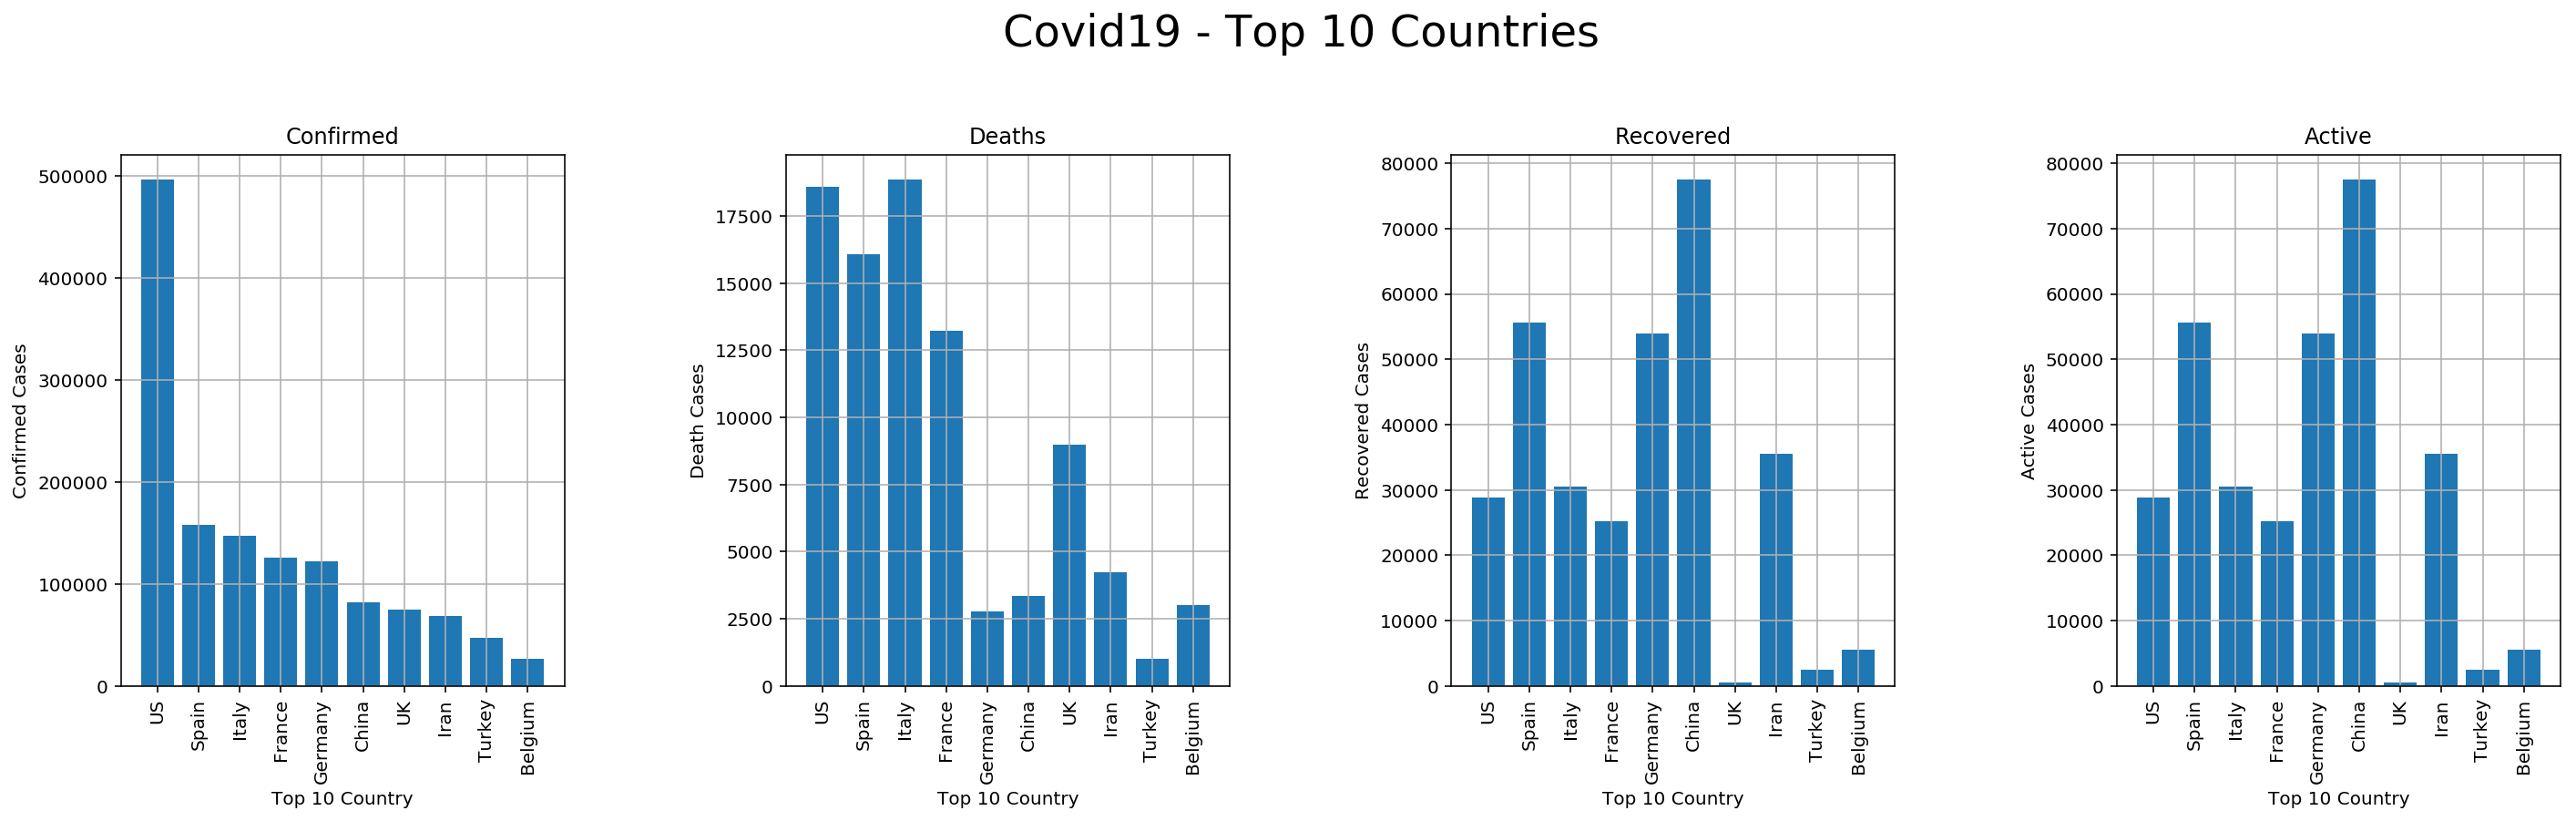

In [35]:
fig, axs  = plt.subplots(1,4, figsize=(24, 6))

ax_x = top10['Country']

ax_y0 = top10['Confirmed']
ax_y1 = top10['Deaths']
ax_y2 = top10['Recovered']
ax_y3 = top10['Active']

axs[0].bar(ax_x, ax_y0)
axs[0].set_xlabel('Top 10 Country')
axs[0].set_ylabel('Confirmed Cases')
axs[0].title.set_text('Confirmed')

axs[1].bar(ax_x, ax_y1)
axs[1].set_xlabel('Top 10 Country')
axs[1].set_ylabel('Death Cases')
axs[1].title.set_text('Deaths')

axs[2].bar(ax_x, ax_y2)
axs[2].set_xlabel('Top 10 Country')
axs[2].set_ylabel('Recovered Cases')
axs[2].title.set_text('Recovered')

axs[3].bar(ax_x, ax_y2)
axs[3].set_xlabel('Top 10 Country')
axs[3].set_ylabel('Active Cases')
axs[3].title.set_text('Active')

for ax in axs:
    ax.tick_params('x', labelrotation=90)
    ax.grid(axis='both')

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(top = 0.8)

fig.suptitle("Covid19 - Top 10 Countries", fontsize = 24)
plt.show()

## Rest Of World

In [36]:
rest_of_world = CountryWiseData[CountryWiseData['Country'] !='China'][["Country", "Confirmed","Deaths","Recovered", "Active"]]

# Reset Index
rest_of_world.reset_index(drop=True, inplace=True)
rest_of_world.index = pd.RangeIndex(start=1, stop=len(CountryWiseData['Country']), step=1)

formatted_text('***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_world

***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***

,Country,Confirmed,Deaths,Recovered,Active
1,Afghanistan,521.0,15.0,32.0,474.0
2,Albania,416.0,23.0,182.0,211.0
3,Algeria,1761.0,256.0,405.0,1100.0
4,Andorra,601.0,26.0,71.0,504.0
5,Angola,19.0,2.0,2.0,15.0
...,...,...,...,...,...
182,West Bank and Gaza,267.0,2.0,45.0,220.0
183,Western Sahara,4.0,0.0,0.0,4.0
184,Yemen,1.0,0.0,0.0,1.0
185,Zambia,40.0,2.0,25.0,13.0


In [37]:
formatted_text('***Most number of Confirmed Cases Outside of China***')
print(rest_of_world[rest_of_world['Confirmed'] > 20])

***Most number of Confirmed Cases Outside of China***

                Country  Confirmed  Deaths  Recovered  Active
1           Afghanistan      521.0    15.0       32.0   474.0
2               Albania      416.0    23.0      182.0   211.0
3               Algeria     1761.0   256.0      405.0  1100.0
4               Andorra      601.0    26.0       71.0   504.0
7             Argentina     1975.0    82.0      375.0  1518.0
..                  ...        ...     ...        ...     ...
179          Uzbekistan      624.0     3.0       42.0   579.0
180           Venezuela      171.0     9.0       84.0    78.0
181             Vietnam      257.0     0.0      144.0   113.0
182  West Bank and Gaza      267.0     2.0       45.0   220.0
185              Zambia       40.0     2.0       25.0    13.0

[145 rows x 5 columns]


([<matplotlib.axis.XTick at 0x7f15023760b8>,
 <a list of 186 Text xticklabel objects>)

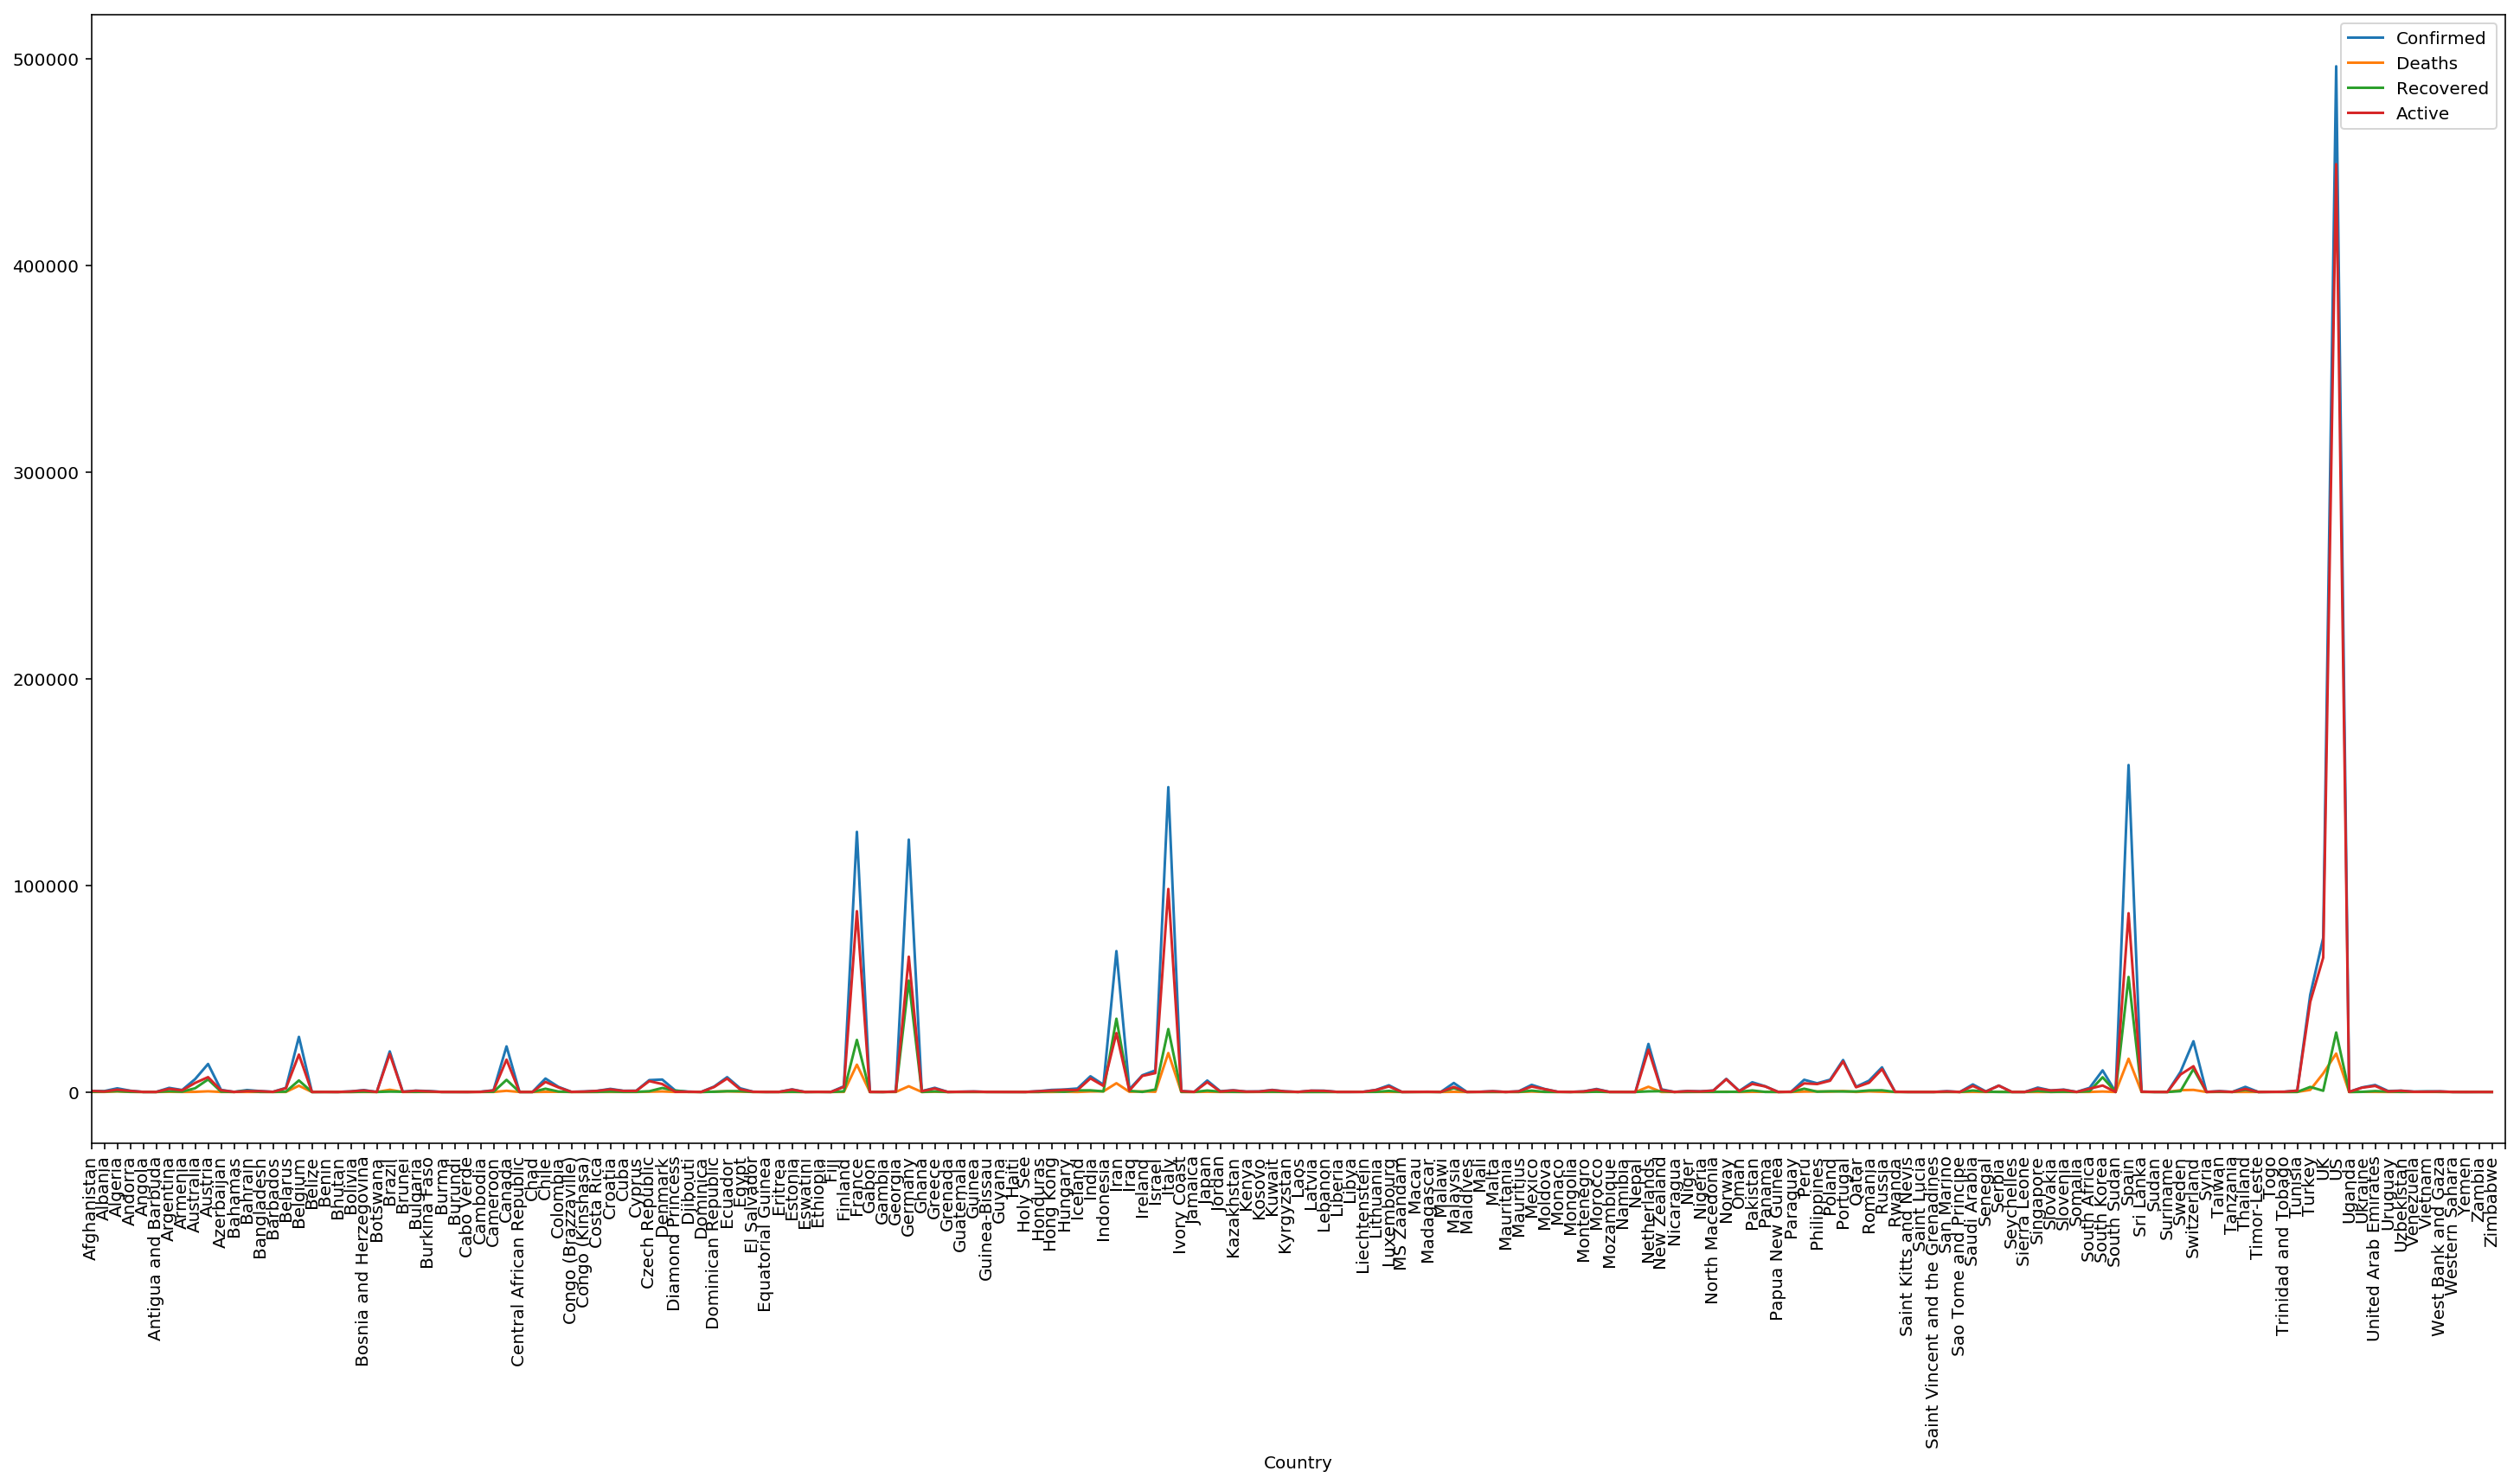

In [38]:
rest_of_world.plot('Country',['Confirmed', 'Deaths', 'Recovered', 'Active'],figsize=(25,12), fontsize=10)
tick_labels = rest_of_world['Country']
plt.xticks(range(0, len(rest_of_world.Country) + 1) , tick_labels, rotation=90)

## nCov - Spread over time in Rest of World (Excluding China)

In [39]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered", "Active"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
rest_of_world_over_time = nCoV_data[(nCoV_data['Country'] != 'China')]
rest_of_world_over_time = rest_of_world_over_time.groupby('Date')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(rest_of_world_over_time, "<b>Rest of World</b>")

**INFERENCES**

1. Rest of World has reported cases from 27 different countries outsdie China. Most of the cases have been reported from          Thailand, Singapore and Japan.

2. Honkong, Australia, South Korea have also reported more than 10 cases.

3. India has reported 3 cases so far.

## Sun Burst Chart

### Confirmed

In [40]:
# Confirmed
fig = px.sunburst(latest_nCoV_data.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country", "State"], values="Confirmed", height=700,
                 title='Number of Confirmed cases reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

### Recovered

In [41]:
# Recovered
fig = px.sunburst(latest_nCoV_data.sort_values(by='Recovered', ascending=False).reset_index(drop=True), 
                 path=["Country", "State"], values="Recovered", height=700,
                 title='Number of Recovered cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

### Deaths

In [42]:
# Deaths
fig = px.sunburst(latest_nCoV_data.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country", "State"], values="Deaths", height=700,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

### Active

# Country-wise Analysis

## 1. United States of America 

In [43]:
covid_19_USA = nCoV_data[nCoV_data['Country'] == 'US']
covid_19_USA = covid_19_USA.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

# covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Grand Princess']
# covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Diamond Princess']
# #covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Guam']

formatted_text('***USA Numbers -***')

# Data Glimpse
covid_19_USA.head()

***USA Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1.0,0.0,0.0,1.0
1,2020-01-23,1.0,0.0,0.0,1.0
2,2020-01-24,2.0,0.0,0.0,2.0
3,2020-01-25,2.0,0.0,0.0,2.0
4,2020-01-26,5.0,0.0,0.0,5.0


In [44]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_USA, "USA")

In [45]:
# USA - Cases over time
scatterPlotCasesOverTime(covid_19_USA, "<b>USA</b>")

## 2. ITALY

In [46]:
covid_19_ITALY = nCoV_data[nCoV_data['Country'] == 'Italy']
covid_19_ITALY = covid_19_ITALY.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***ITALY Numbers -***')

# Data Glimpse
covid_19_ITALY.head()

***ITALY Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-31,2.0,0.0,0.0,2.0
1,2020-02-01,2.0,0.0,0.0,2.0
2,2020-02-02,2.0,0.0,0.0,2.0
3,2020-02-03,2.0,0.0,0.0,2.0
4,2020-02-04,2.0,0.0,0.0,2.0


In [47]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_ITALY, "ITALY")

In [48]:
# ITALY - Cases over time
scatterPlotCasesOverTime(covid_19_ITALY, "<b>ITALY</b>")

## 3. France

In [49]:
covid_19_France = nCoV_data[nCoV_data['Country'] == 'France']
covid_19_France = covid_19_France.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***FRANCE Numbers -***')

# Data Glimpse
covid_19_France.head()

***FRANCE Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-24,2.0,0.0,0.0,2.0
1,2020-01-25,3.0,0.0,0.0,3.0
2,2020-01-26,3.0,0.0,0.0,3.0
3,2020-01-27,3.0,0.0,0.0,3.0
4,2020-01-28,4.0,0.0,0.0,4.0


In [50]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_France, "FRANCE")

In [51]:
# FRANCE - Cases over time
scatterPlotCasesOverTime(covid_19_France, "<b>FRANCE</b>")

## 4. Spain

In [52]:
covid_19_Spain = nCoV_data[nCoV_data['Country'] == 'Spain']
covid_19_Spain = covid_19_Spain.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***Spain Numbers -***')

# Data Glimpse
covid_19_Spain.head()

***Spain Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-02-01,1.0,0.0,0.0,1.0
1,2020-02-02,1.0,0.0,0.0,1.0
2,2020-02-03,1.0,0.0,0.0,1.0
3,2020-02-04,1.0,0.0,0.0,1.0
4,2020-02-05,1.0,0.0,0.0,1.0


In [53]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_Spain, "SPAIN")


In [54]:
# SPAIN - Cases over time
scatterPlotCasesOverTime(covid_19_Spain, "<b>SPAIN</b>")

## 5. United Kingdom

In [55]:
covid_19_UK = nCoV_data[nCoV_data['Country'] == 'UK']
covid_19_UK = covid_19_UK.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***UK Numbers -***')

# Data Glimpse
covid_19_UK.head()

***UK Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-31,2.0,0.0,0.0,2.0
1,2020-02-01,2.0,0.0,0.0,2.0
2,2020-02-02,2.0,0.0,0.0,2.0
3,2020-02-03,2.0,0.0,0.0,2.0
4,2020-02-04,2.0,0.0,0.0,2.0


In [56]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_UK, "UK")


In [57]:
# UK - Cases over time
scatterPlotCasesOverTime(covid_19_UK, "<b>UK</b>")

## 6. Iran

In [58]:
covid_19_Iran = nCoV_data[nCoV_data['Country'] == 'Iran']
covid_19_Iran = covid_19_Iran.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***IRAN Numbers -***')

# Data Glimpse
covid_19_Iran.head()

***IRAN Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-02-19,2.0,2.0,0.0,0.0
1,2020-02-20,5.0,2.0,0.0,3.0
2,2020-02-21,18.0,4.0,0.0,14.0
3,2020-02-22,28.0,5.0,0.0,23.0
4,2020-02-23,43.0,8.0,0.0,35.0


In [59]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_Iran, "IRAN")

In [60]:
# IRAN - Cases over time
scatterPlotCasesOverTime(covid_19_Iran, "<b>IRAN</b>")

## 7. South Korea

In [61]:
covid_19_SKorea = nCoV_data[nCoV_data['Country'] == 'South Korea']
covid_19_SKorea = covid_19_SKorea.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***South Korea Numbers -***')

# Data Glimpse
covid_19_SKorea.head()

***South Korea Numbers -***

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1.0,0.0,0.0,1.0
1,2020-01-23,1.0,0.0,0.0,1.0
2,2020-01-24,2.0,0.0,0.0,2.0
3,2020-01-25,2.0,0.0,0.0,2.0
4,2020-01-26,3.0,0.0,0.0,3.0


In [62]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_SKorea, "South Korea")

In [63]:
# South Korea - Cases over time
scatterPlotCasesOverTime(covid_19_SKorea, "<b>South Korea</b>")

##### Analysis South Korea specific data...

In [64]:
SKor_Covid_19 = pd.read_csv('/kaggle/input/coronavirusdataset/Case.csv')
#SKor_Covid_19.head()

### Convert 'from other city', '-' in cities to 'Others'
SKor_Covid_19['city'] = np.where(SKor_Covid_19['city'] == '-', 'Others', SKor_Covid_19['city'])
SKor_Covid_19['city'] = np.where(SKor_Covid_19['city'] == 'from other city', 'Others', SKor_Covid_19['city'])

SKor_Covid_19['latitude'] = np.where(SKor_Covid_19['latitude'] == '-', '37.00', SKor_Covid_19['latitude'])
SKor_Covid_19['longitude'] = np.where(SKor_Covid_19['longitude'] == '-', '127.30', SKor_Covid_19['longitude'])

SKor_Covid_19

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,40,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
...,...,...,...,...,...,...,...,...
105,6100009,Gyeongsangnam-do,Others,False,contact with patient,6,37.00,127.30
106,6100010,Gyeongsangnam-do,Others,False,etc,18,37.00,127.30
107,7000001,Jeju-do,Others,False,overseas inflow,7,37.00,127.30
108,7000002,Jeju-do,Others,False,contact with patient,0,37.00,127.30


In [65]:
SKorea_citywise_data = pd.DataFrame(SKor_Covid_19.groupby(['city'], as_index=False)['confirmed'].sum())
fig = px.bar(SKorea_citywise_data.sort_values('confirmed', ascending=False), 
             x="confirmed", y="city", title='Total Confirmed Cases', text='confirmed', orientation='h', 
             width=2000, height=700, range_x = [0, max(SKorea_citywise_data['confirmed']) + 2])
fig.update_traces(marker_color='#0726ed', opacity=0.8, textposition='outside')

fig.update_layout(plot_bgcolor='rgb(208, 236, 245)')
fig.show()

**Reason of the Virus Infection**

In [66]:
SKor_patient_info = pd.read_csv("../input/coronavirusdataset/PatientInfo.csv")
SKor_patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


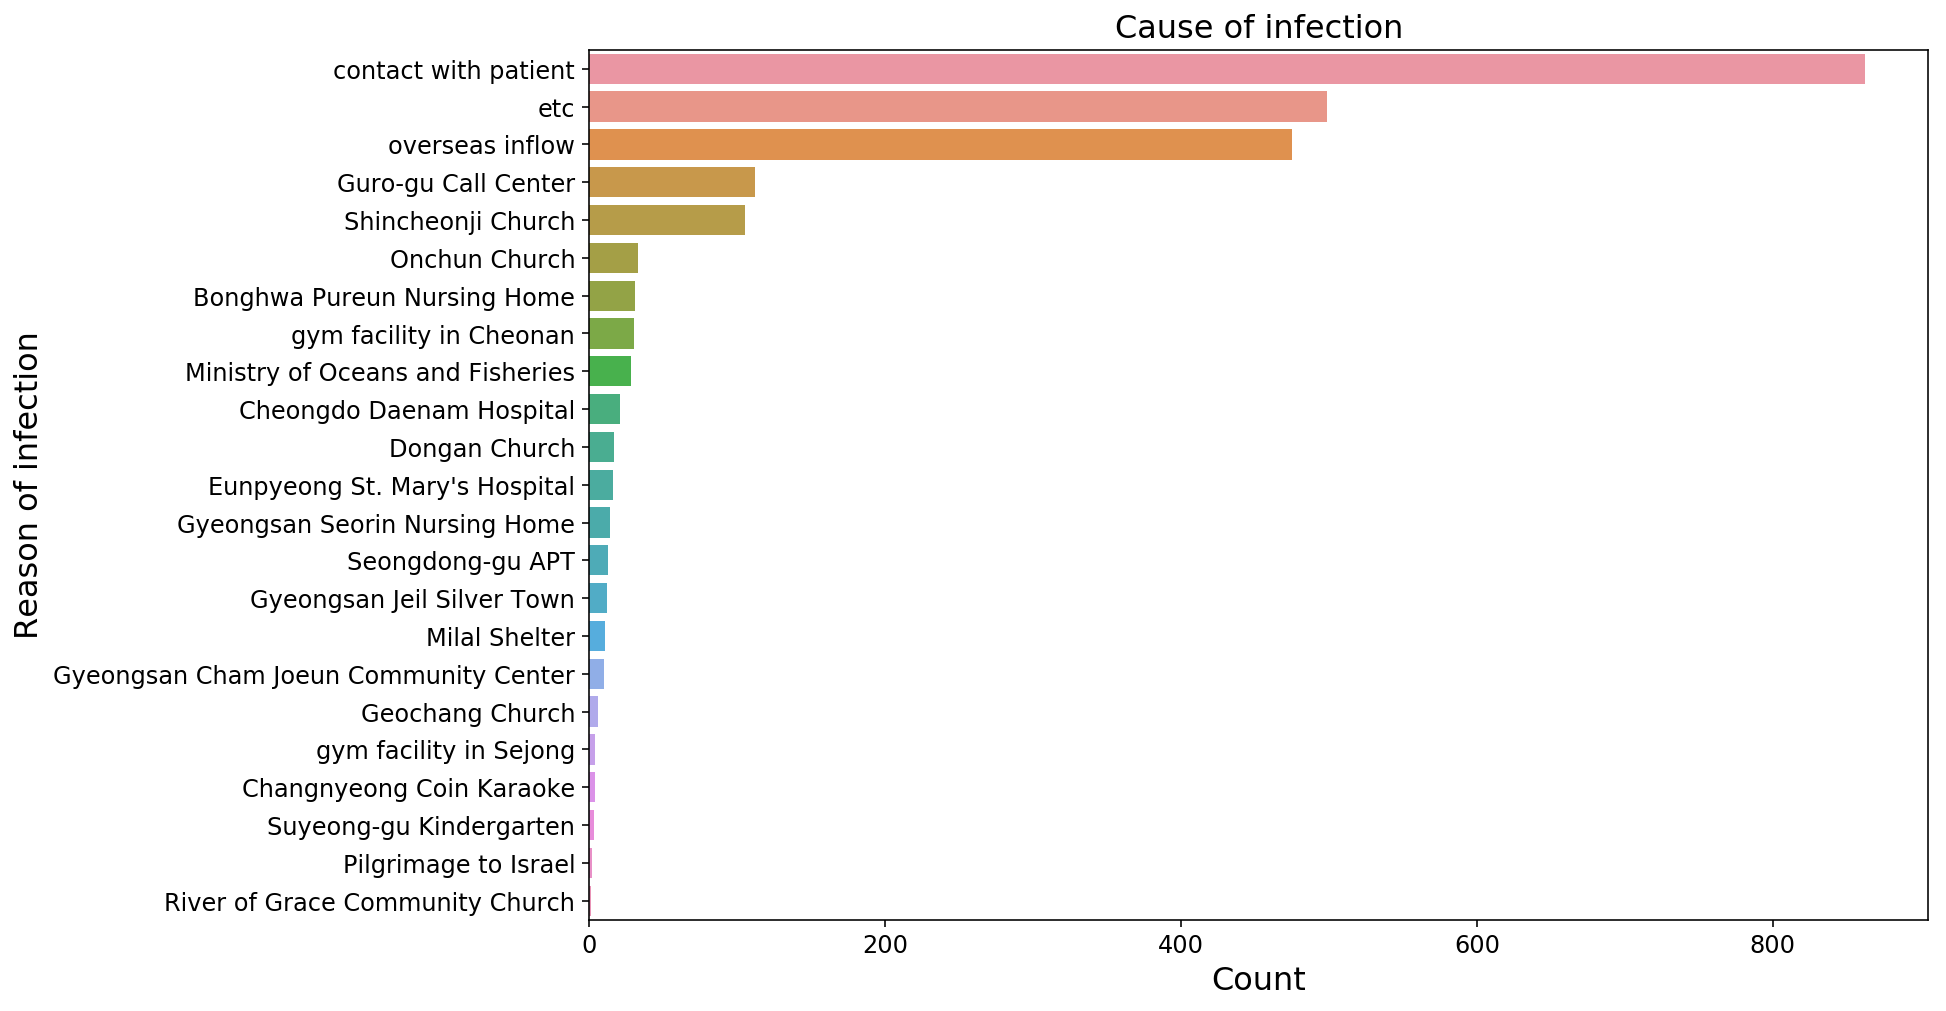

In [67]:
plt.figure(figsize=(12, 8))
sns.countplot(y = "infection_case",
              data=SKor_patient_info,
              order=list(SKor_patient_info["infection_case"].value_counts().index))
plt.title("Cause of infection", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Reason of infection", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

***That implies coming in contact with a carrier person is the major reason for the transmission of virus. This is the case not only in South Korea but also globally in other countries as well.***

# Worst Hit States - Timeline Comparison...

In [79]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Confirmed'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Total Confirmed Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [80]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Deaths'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Total Deaths Reported',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [81]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Recovered'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Total Recovered Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [82]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Active'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Currrent Active Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()